In [2]:
# Primero hay que importar las librerías necesarias para leer un dataset y convertirlo en un df
import pandas as pd


In [3]:
df=pd.read_csv('C:/Users/diana/apps/proyectoprogra/proyecto_cocina/data/raw/Cuisine_rating.csv')
df.head()

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


In [4]:
# Ver que columnas contienen valores faltantes y el tipo de datos que contiene [Numéricos, Categóricos]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User ID         200 non-null    int64  
 1   Area code       200 non-null    int64  
 2   Location        200 non-null    object 
 3   Gender          200 non-null    object 
 4   YOB             200 non-null    int64  
 5   Marital Status  200 non-null    object 
 6   Activity        200 non-null    object 
 7   Budget          200 non-null    int64  
 8   Cuisines        200 non-null    object 
 9   Alcohol         200 non-null    object 
 10  Smoker          200 non-null    object 
 11  Food Rating     200 non-null    int64  
 12  Service Rating  200 non-null    int64  
 13  Overall Rating  200 non-null    float64
 14  Often A S       200 non-null    object 
dtypes: float64(1), int64(6), object(8)
memory usage: 23.6+ KB


In [5]:
# Hay 7 features numéricos [User ID, Area code,YOB (Año de nacimiento), Budget, Food Rating, Service Rating, Overall Rating]
# Sin embargo, no hay necesidad de sacarle medidas de TC a User Id, Area Code & YOB ya que no nos da ningun valor significativo

df[['Budget', 'Food Rating', 'Service Rating','Overall Rating']].describe()

,Budget,Food Rating,Service Rating,Overall Rating
count,200.000000,200.000000,200.000000,200.000000
mean,3.815000,3.220000,3.230000,3.225000
std,1.056578,1.411226,1.526022,1.079445
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,2.000000,2.000000,2.500000
50%,4.000000,3.000000,3.000000,3.000000
75%,5.000000,5.000000,5.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


<Axes: >

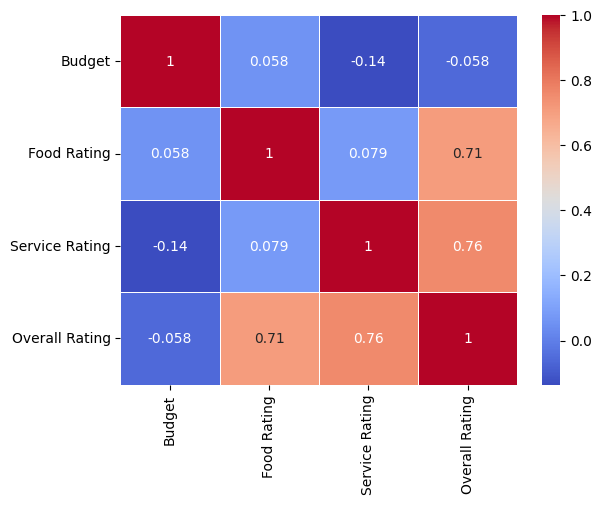

In [6]:
# Ver si existe alguna correlación entre las variables numéricas
correlacion = df[['Budget', 'Food Rating', 'Service Rating', 'Overall Rating']].corr()

# importar las herramientas para realizar un mapa de calor
import seaborn as sns
sns.heatmap(correlacion, annot=True, cmap='coolwarm', linewidths=.5)


##### Lo único que se puede rescatar de este heatmap es que ninguna de las variables numéricas parece tener una fuerte correlacion con otra a excepción de Overall Rating, que esta relacionada tanto con los ratings de la comida como del servicio

In [7]:
# Calcula la media de las calificaciones de alimentos para cada categoría de cocina y las ordena
ratings_por_comida = df.groupby('Cuisines')['Food Rating'].mean().sort_values() 

# La línea anterior devuelve una serie, asi que para convertirlo a un df se hace lo siguiente
ratings_por_comida_df = ratings_por_comida.to_frame().reset_index()



<Axes: xlabel='Cuisines', ylabel='Food Rating'>

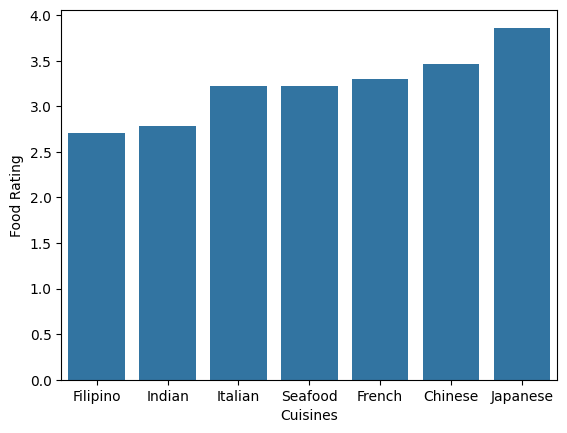

In [8]:
sns.barplot(y='Food Rating', x='Cuisines', data=ratings_por_comida_df)

##### En promedio, las cocinas con mejor rating son la Japonesa, China, y Francesa.

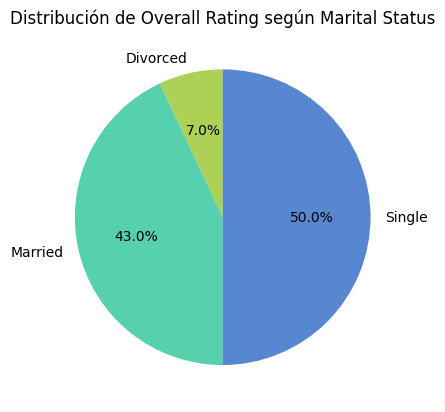

In [9]:
# Agrupar por 'Marital Status' y contar el tamaño de cada grupo
ratins_segun_MS= df.groupby('Marital Status')['Overall Rating'].size()
import matplotlib.pyplot as plt
# Crear el diagrama de pastel
plt.pie(ratins_segun_MS, labels=ratins_segun_MS.index, autopct='%1.1f%%', startangle=90, colors=['#ADD057','#57D0AD','#5787D0'])
#Los parámetros label, autopct y startangle son solo para dar formato y que se vea mejor la gráfica
plt.title('Distribución de Overall Rating según Marital Status')
plt.show()

##### La mayoría de los usuarios en el data set de datos son solteros (50%), seguidos por aquellos que están casados (43%). El grupo de divorciados tiene el porcentaje más bajo (7%).

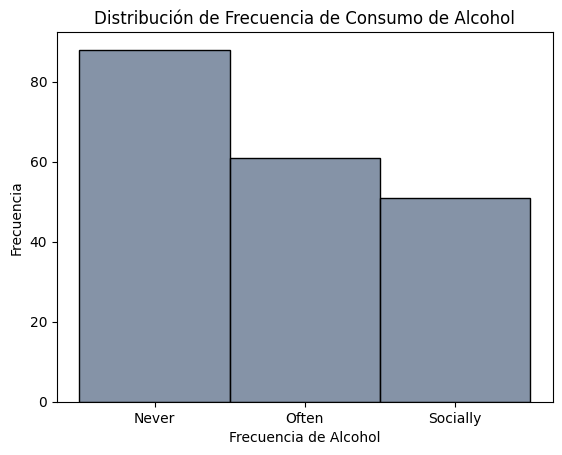

In [10]:
# Checar la distribución del dataset basándonos en el consumo de alcohol de los usuarios
sns.histplot(data=df, x='Alcohol ', bins=10, kde=False, color='#5C6F8A')
plt.title('Distribución de Frecuencia de Consumo de Alcohol')
plt.xlabel('Frecuencia de Alcohol')
plt.ylabel('Frecuencia')
plt.show()



##### La mayoría de los encuestados no consumen alcohol

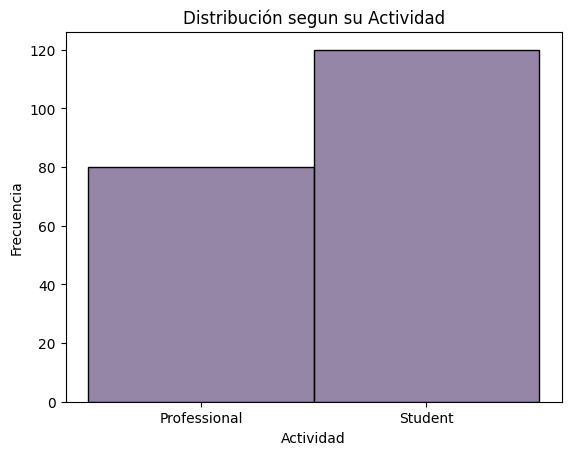

In [13]:
# Checar la distribución del dataset basándonos en la actividad de los usuarios
sns.histplot(data=df, x='Activity', bins=10, kde=False, color='#725C8A')
plt.title('Distribución segun su Actividad')
plt.xlabel('Actividad')
plt.ylabel('Frecuencia')
plt.show()

##### La minoría de los encuestados son profesionales, lo que indica que hay más probabilidad que alguien que de un rating a un restaurante sea un estudiante antes que un profesional

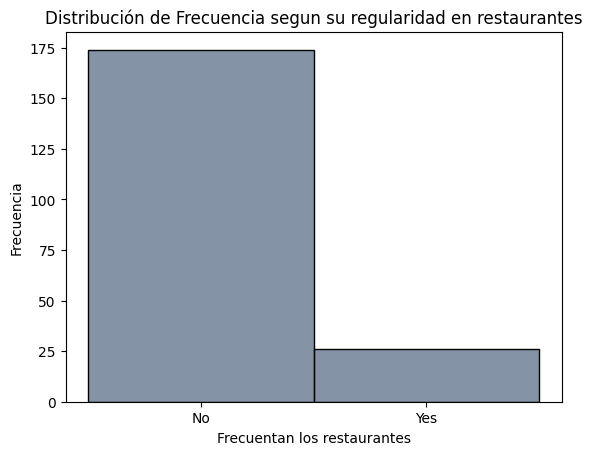

In [15]:
# Checar la distribución del dataset basándonos en si son clientes frecuentes
sns.histplot(data=df, x='Often A S', bins=10, kde=False, color='#5C6F8A')
plt.title('Distribución de Frecuencia segun su regularidad en restaurantes')
plt.xlabel('Frecuentan los restaurantes')
plt.ylabel('Frecuencia')
plt.show()

##### La gran mayoría de los encuestados no es un cliente frecuente de los restaurantes a los cuáles da una reseña